# <font color = 'dodgerblue'>**HW1b Numpy (Total Points - 10)** </font>

You have to submit two files for this part of the  HW
1. FirstNameLastName_Hw1b.ipynb (colab notebook)
2. FirstNameLastName_Hw1b.pdf pdf file**



In [3]:
#import the package
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
np.__version__

'1.23.5'

# <font color = 'dodgerblue'>  **Linear Regression** </font>
1. Linear regression is a linear approach to modelling the relationship between a **dependent variable** and one or more **independent variables**.
2.  Representation of Linear regression  
  $y \approx \theta_0 + \theta_1x_1$
  
  where,

  $y$ is a dependent variable
  
  $x_1, x_2$ are independent variables
  
  $\theta_0, \theta_1x_1, \theta_2$ are parameters
  
    
3. We are given $y, x_1, x_2$. We need to estimate the parameters $\theta_0, \theta_1$  .


# <font color = 'dodgerblue'> **Gradient descent** </font>

1. Gradient descent is the backbone of the machine learning.
2. It is an optimization process which is used to train the models in the machine learning.
3. Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).
4. A gradient simply measures the change in all weights with regard to the change in error.

5. Let's check the following explaination of the gradient descent and how we use it as follows:

# <font color = 'dodgerblue'>  **Create a dataset**



## <font color = 'dodgerblue'>  **Task1: Generate independent variable (X) - 1 Point**


* Generate $\boldsymbol{X}$ by darwing samples from unifrom distribution
* The shape of $\boldsymbol{X}$ should be (100, 2). This means we will have 100 observations and 2 variables. Column 1 represents $\mathbf{x_1}$ and column 2 represents $\mathbf{x_2}$
* All values in matrix $\mathbf{X}$ should lie between 0 and 5 (Hint if we use random.rand(), it will give you values from uniform distribution. However the values will lie between 0 and 1



In [10]:
np.random.seed(seed=123) # pleasse do not change this

# genrate X
X = np.random.rand(100, 2)*5 #  your code here

# Print first five values of X
print(X[:5])
print(X.shape)

[[3.48234593 1.43069667]
 [1.13425727 2.75657385]
 [3.59734485 2.1155323 ]
 [4.90382099 3.42414869]
 [2.40465951 1.96058759]]
(100, 2)


## <font color = 'dodgerblue'> **Task2: Generate Dependent Variable (Y) - 1 Points**

Assume : $\theta_0$ = 2 , $\theta_1$ = 5  , $\theta_2$ = 3 <br>
Generate y using following :
$\mathbf{y} = \theta_0 + \theta_1 \mathbf{x_1} + \theta_2 \mathbf{x_2} + noise$

where noise is a random normal array of shape (100, 1)

In [23]:
np.random.seed(seed=123) # pleasse do not change this
theta0 = 2
theta1 = 5
theta2 = 3
# use np.random.randn to get 100 values from nornal distribution. The array should have the shape (100, 1)
noise =   np.random.rand(100, 1)

# use array slicing to get x1 and x2 from X; x1 is the first column and x2 is the second column of  X

# check the shape of x1 and x2. The shape should be (100, 1) i.e. it should have two dimensions
# If teh shape is not (100, 1) then reshape x1 and x2 to have shape (100, 1)

x1 = X[:, 0].reshape(100,1)
x2 = X[:, 1].reshape(100,1)

# use formulae y = theta0 + theta1 * x1 + theta2 * x2 + noise
y = theta0 + theta1*x1 + theta2*x2

# Print first five values of y
print(y[:5])
print(y.shape)

[[23.70381966]
 [15.94100788]
 [26.33332115]
 [36.79155104]
 [19.90506031]]
(100, 1)


# <font color = 'dodgerblue'> Visualize the Data

* Here we are using matplotlib's package pyplot module to visualize the data points. We will further discuss about this package in our course.
* The main aim for visualizing a data is to understand the data to check the outliers, spread, correlation of the data etc. which will be discussed later on.

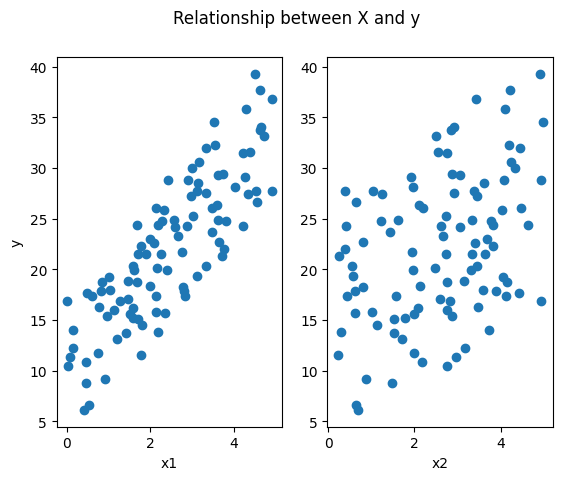

In [24]:
# Let's plot the values of X and y
# Let's use the scatter plot graph
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Relationship between X and y')
ax1.scatter(x1, y)
ax2.scatter(x2, y)
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax2.set_xlabel('x2')
#It is used to show the graph
plt.show();

# <font color = 'dodgerblue'>  Predicted Value of Dependent Variable
We can estimate the predicted value of y for a particular instance (observation) using following equation:

$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2  + \cdot\cdot\cdot+ \theta_nx_n$

In this equation:<br>
$\hat{y}$ is the predicted value of $y$.<br>
$n$ is the number of features (independent variables).<br>
$x_i$ is the ith feature value.<br>
$\theta_j$ is the $j^{th}$ model parameter.


We can write this in vectorized form as follows <br><br>
$\hat{y} = h_{\theta}(\mathbf{x}) = \boldsymbol{\theta}^Tx = \begin{bmatrix}
\theta_0 \theta_1\cdot\cdot\cdot\theta_n\end{bmatrix} \begin{bmatrix}
x_0 \\ x_1 \\ \cdot \\ \cdot \\ \cdot\ \\ x_n\end{bmatrix}=
 \boldsymbol{\theta} \cdot \mathbf{x} $

Here <br>
$\boldsymbol{\theta}$ is vector of model parameters <br>
$\mathbf{x}$ is the instance’s feature vector, containing $x_0 $ to $x_n$, with $x_0$  always equal to 1. <br>
$\boldsymbol{\theta} \cdot \mathbf{x}$ is the dot product of the vectors $\boldsymbol{\theta}$ and $\mathbf{x}$ which is equal to $\theta_0x_0 + \theta_1x_1 +\cdot \cdot \cdot \theta_nx_n$

The training examples are stored in matrix $\boldsymbol{X}$ row-wise <br><br>
$\boldsymbol{X} =  \begin{bmatrix}
x_0^{(1)}x_1^{(1)}\cdot\cdot\cdot x_n^{(1)} \\ x_0^{(2)}x_1^{(2)}\cdot\cdot\cdot x_n^{(2)}  \\ \cdot \\ \cdot \\ \cdot\ \\ x_0^{(m)}x_1^{(m)}\cdot\cdot\cdot x_n^{(m)} \end{bmatrix}$ , $ \boldsymbol{\theta} =\begin{bmatrix}
\theta_0 \\ \theta_1 \\ \cdot \\ \cdot \\ \cdot \\ \theta_n\end{bmatrix}$.

We can calculale the predicted values of y for all m observations using follwoing:

$h_{\theta}(\boldsymbol{X}) = \boldsymbol{X} \boldsymbol{\theta}$
where $\boldsymbol{X} \boldsymbol{\theta}$ is matrix multiplication of $\boldsymbol{X}$ and $\boldsymbol{\theta}$






# <font color = 'dodgerblue'>  **Task3: Cost Function - 2 Points**

*  The cost function is defined as sum of the squares of the difference between predicted values and avtual values of $y$.
* The equation for calculating cost function is shown below.
* The cost function for other algorithm will be different and the gradients are always derived from the cost functions.

* Our main aim is to get the predicted line ($\hat{y}$) such that the total distance from alll the points (actual $y$ values) is minimized i.e. we want to find a line tha best fits our dataset.<br>

<img src="https://drive.google.com/uc?export=view&id=1YxklCQcCLKD3GiSa7ZQPW734DQkdC4hO" width="400"/>

<b>Cost function Formulae</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
\end{equation}

here $m$ is number of observations

* Let's define a cost function by following the mentioned steps below.
*  It's fine if we don't know the concept completely. Its just for numpy practice exercise.
* We will be discussing about cost functions and gradient descents in our future lectures.

In [46]:
def calculate_cost(X, y, theta,):
  """
  In this function we will calculate the cost value by using the above formula
  J()=1/2m∑(prediction−y)^(2)
  where m = number of y values (number of observations)
  we know that,
  prediction = xθ (matrix multiplication of X and θ )

  """
  # Find the length of the y by using np.size() method and equate it to m
  # calculate 1/(2*m) and assign it to 'a'.
  # calculate Xθ (matrix multiplication of X and theta) and assign it to prediction
  # Find the difference between predictions and y and assign it to error
  # Square the error by using np.square() method and assign it to square_error
  # Use sum() method of numpy to caculate the sum of square_error. Assign it to b
  # Now multiply a, b and assign it to J.

  m = y.shape[0]   # your code here
  a = (2*m)**(-1)   # your code here
  prediction = np.dot(X, theta) # your code here
  error = prediction - y  # your code here
  square_error = error**2 # your code here
  b = np.sum(square_error) # your code here
  J = a*b    # your code here

  return J

# <font color = 'dodgerblue'>  **Task4: Feature Scaling - Scaling at absolute maximum - 2 Points** </font>

1. Feature sacling is one of the important step in the many machine learning models.
2. We actually compress our input variable into smaller and similar magnitude for faster calculations.
3. Scaling is a technique to seggregate the date between 0 to 1.

$X_{scaled} = \dfrac{X}{max(abs(X))}$



In [33]:
# Use the above formulae to calculate X_scaled
# Hint (Since X is a matrix, we will need to be careful in specifying axis for max opeartion)

X_scaled = X/np.max(abs(X), axis = 0) # your code here
# print first five values of X_Scaled
print(X_scaled[:5 ])

print(X_scaled.shape)


[[0.70813816 0.28747365]
 [0.23065223 0.55388564]
 [0.7315233  0.42507947]
 [0.99719639 0.68802321]
 [0.48898966 0.39394603]]
(100, 2)


# <font color = 'dodgerblue'>  **Task5: Initialize the parameter- 2 Points**
Since, we have created the cost function. Now we will be assigning some values to the parameter and call the cost function.

In [38]:
# initializing parameter
# check the shape of the X_scaled (X Scaled)
# if the shape of the X_scaled is (100,2) then we won't reshape
# If the shape of the X_scaled is not (100,2) then Reshape the X_scaled variable as (100, 2)
# We take an additional value in X i.e a column of ones
# Create a numpy array of ones with shape (100, 1) and assign it to X_ones
# Use hstack to combine the X_ones and X_scaled and assign it to X_b
# Create a numpy array of zeros with shape (3, 1) and assign it to theta
# this represents the initial value of theta1, theta2 and theta3
# print first five rows of X_b
# print theta
# print shape of X_b (shape should be (100, 3)
# print shape of theta (shape should be (3, 1))

# your code here # Print shape of xscaled (the sjape should be (100, 2))
X_ones = np.ones((100,1)) # your code here
X_b = np.hstack((X_ones, X_scaled))  # your code here

theta = np.zeros((3, 1)) # your code here

print(X_b[:5])    # your code here # print first five rows of X_b and
print(theta) # your code here # print theta
print(X_b.shape)  # your code here # print shape of X_b (shape should be (100, 3)
print(theta.shape) # your code here # print shape of theta (shape should be (3, 1))


[[1.         0.70813816 0.28747365]
 [1.         0.23065223 0.55388564]
 [1.         0.7315233  0.42507947]
 [1.         0.99719639 0.68802321]
 [1.         0.48898966 0.39394603]]
[[0.]
 [0.]
 [0.]]
(100, 3)
(3, 1)


Now our aim is to reduce this initial cost value further, so that we can achieve the optimal linear fit for our data. This initial cost value corresponds to initial zero value for  $\theta_0$, $\theta_1$ and $\theta_2$. We need to find values of  $\theta_0$, $\theta_1$  and $\theta_2$ for which the cost function is minimized.

#<font color = 'dodgerblue'>  **Task6: Gradient descent - 2 Points**
Gradient descend is a one such algorithm used to find the optimal parameter ‘theta’ using the given parameters ,

**x** — Input values

**y** — output values

**Initial_theta** — in most cases consdiered as NULL theta

**alpha** — alpha is the learning rate.

**iteration** — setting how many iteration it should take

<b> Understanding “Gradinet Desecnd” may require bit of calculus , but it is not necessary for this exercise. We will provide you exact formulae to implement gradient descent using numpy. </b><br><br>

Further explaination of the gradient descent is given below :-

<b>Gradient descent for the cost function</b>

First we calculate the partial derivative of parameter $(\theta_j)$ with respect to cost ($J$). This is called the gradient. For our cost finction the partial derivative (gradient is as follows):

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}) \cdot x_j^{(i)}
\end{equation}

Gradient Descent Algorithm: Repeat until convergence (usually we will use finite number of iterations):
\begin{equation}
\theta_j: = \theta_j -\alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation}

So basically we start with some initial values of $\theta_j$ and use the above equation to update the value of $\theta_j$ until convergence.


In our case we will repeatedly (= number of interations) update the values of $\theta_0, \theta_1$, and $\theta_2$ using the following equations:

The algorithm starts with some “initial guess” for θ, and then repeatedly
changes θ to make J(θ) smaller, until we converge to a value of
θ that minimizes J(θ).

\begin{equation}
\theta_0: = \theta_0 -\frac{\alpha} {m}  (\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}).x_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\frac{\alpha} {m}  (\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}).x_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(\hat{y}{(i)} - y^{(i)}).x_2^{(i)})
\end{equation}

We can write these equations using following vector form:

\begin{equation}
\theta := \theta - \frac{\alpha} {m}\boldsymbol{X}^T(\boldsymbol{X}\theta - y)
\end\{equation}

here<br><br>
$\theta = \begin{bmatrix}
\theta_0 \\ \theta_1 \\ \theta_2\end{bmatrix}$ <br><br>
$\boldsymbol{X}^T$ is the transpose of X




In [44]:
def gradient_descent(X, y, theta):
    '''
    We can use the above formula of gradient descent and deduce the steps as follows:
    We will initialize the alpha and iteration values as 0.2, 500 respectively.
   '''
    # Find the length of the y by using size() method and equate it to m
    # calculate Xθ (matrix multiplication of X and theta) and assign it to prediction
    # calculate prediction - y and assign it to error
    # Perfrom the matrix multiplication of X^T (transpose of X) and error and assign it to b
    # multiply b with 1/m and assign it to gradient
    # update theta using : theta = theta - alpha* gradient


    alpha = 0.2
    iterations = 500
    m = y.shape[0] # your code here


    # The for loop will execute till 500 iterations
    for iter in range(0, iterations):

          prediction = np.dot(X, theta) # your code here
          error = prediction - y  # your code here
          b =  np.dot(X.T,error) # your code here
          gradient = b/m  # your code here
          theta -= alpha*gradient # your code here

    return theta


Let's use gradient function for our data :


In [47]:
# Call the gardient descent function using (X_b, y and theta) as inputs
# make sure you use X_b as the input and not X
theta_optimized =  gradient_descent(X_b, y, theta)  # your code here

# Call the cost function - (X_b, y and theta_optimized) as inputs
min_cost = calculate_cost(X_b, y, theta_optimized) # your code here

# print the optimal values of theta (theta_optimized)
print(f" The optimal values for theta is : \n {theta_optimized}")

# Print the minimum value of teh ocst
print(f"The minimum cost by using gradient descent is \n {min_cost}")


 The optimal values for theta is : 
 [[ 2.00421224]
 [24.58422794]
 [14.92624335]]
The minimum cost by using gradient descent is 
 9.832662201706245e-07


In [ ]:
# Call the gardient descent function using (X_b, y and theta) as inputs
# make sure you use X_b as the input and not X
theta_optimized = # your code here

# Call the cost function - (X_b, y and theta_optimized) as inputs
min_cost = # your code here

# print the optimal values of theta (theta_optimized)
print(f" The optimal values for theta is : \n {theta_optimized}")

# Print the minimum value of teh ocst
print(f"The minimum cost by using gradient descent is \n {min_cost}")

 The optimal values for theta is : 
 [[ 2.72082712]
 [23.06735392]
 [15.07231658]]
The minimum cost by using gradient descent is 
 0.5658340056883197


# <font color = 'dodgerblue'> **Optional Bonus question:**
We used gardient descent to find the parameters in linear regression. Gradient descent is a genric algorithn which can be applied to other cost finctins as well. The solution to linear regression can also be obtained directly using following normal equation:

\begin{equation}
\theta = {(\boldsymbol{X}^T\boldsymbol{X})}^{-1}\boldsymbol{X}^Ty
\end{equation}

Here ${X}^T$ is transpose of X, and
${(\boldsymbol{X}^T\boldsymbol{X})}^{-1}$ is inverse of matrix ${(\boldsymbol{X}^T\boldsymbol{X})}$


In [ ]:
# Let us check the solutions using normal equation:
# When implementing the above qeuation use X_b and not X

theta_normal_equation = np.dot(X.T, X) # your code here
# print theta_normal_equation
print(theta_normal_equation)

In [ ]:
# Let us check the solutions using normal equation:
# When implementing the above qeuation use X_b and not X

theta_normal_equation = np.dot(X.T, X) # your code here
# print theta_normal_equation
print(theta_normal_equation)

[[ 2.49977269]
 [23.26852909]
 [15.28818944]]
